# Quantum Computing Assignment 1
# James Hund - 24129429

# A 2-Bit Quantum Computer Simulator

### Boilerplate Code

In [26]:
%load_ext autoreload
%autoreload 2
from simulator import *
from plot import *
from IPython.display import Image, display


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A. Command-line Usage Demonstration
The following images demonstrate usage of my 2 Qubit Quantum Computer simulator:
1) The first image is the output of the 'help' command -- which provides a description of the available 2-Qubit gates (Including gates used for The Deutsch Algorithm)
2) The second image shows how a simple entangling circuit can be setup and simulated
3) The last image demonstrates user input validation

For the remainder of the report I will be demonstrating my simulator directly inside of the python notebook.

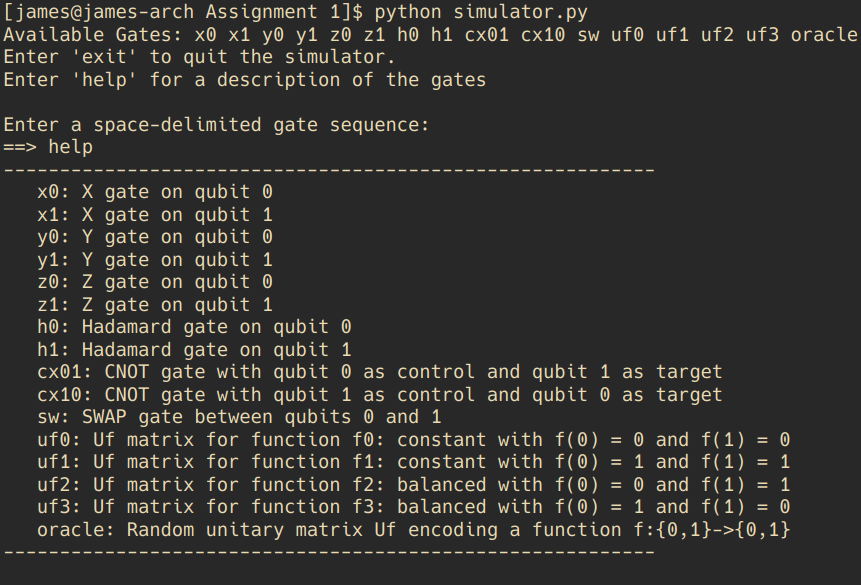

In [27]:
#Image 1: Help menu
display(Image(filename='images/help_command.png'))

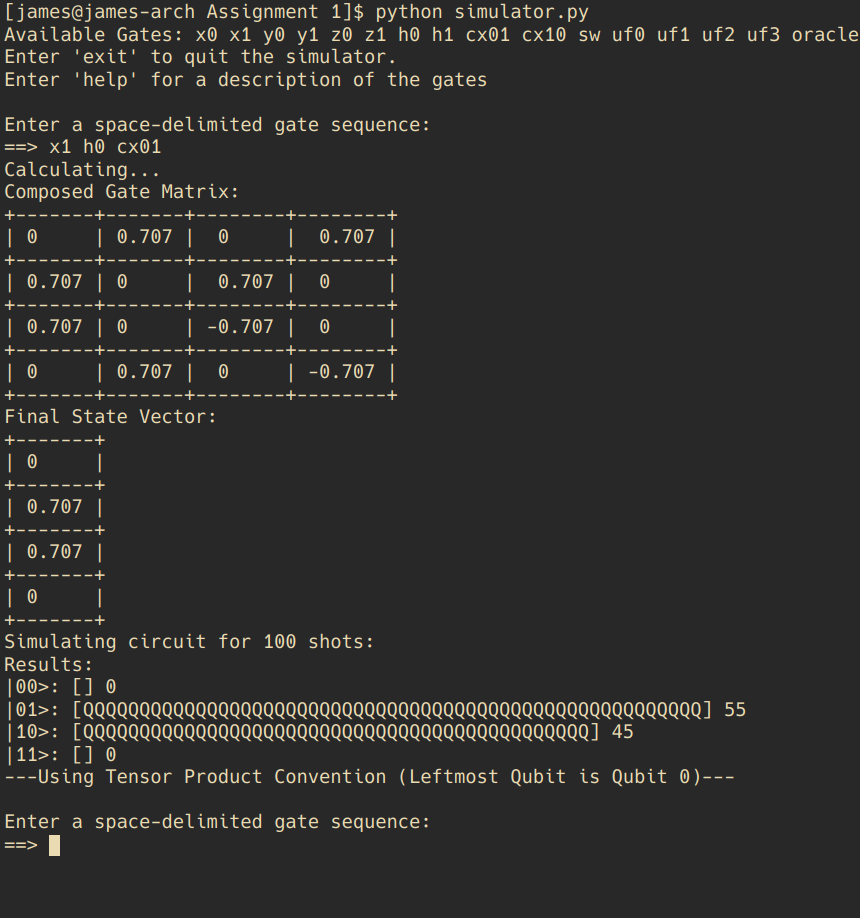

In [28]:
#Image 2: Example circuit
display(Image(filename='images/example_circuit.png'))

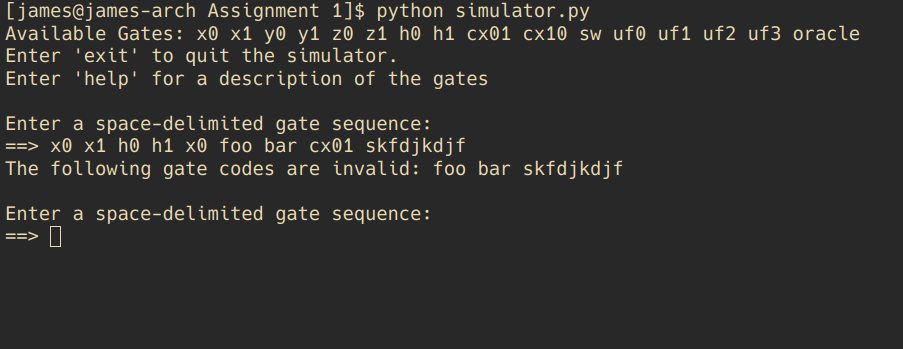

In [29]:
#Image 3: Input Validation
display(Image(filename='images/input_validation.png'))

## B. Implemented Gates

### Pauli X, Y and Z Gates

The Pauli matrices are a set of three 2x2 matrices which are Hermitian and unitary. They play a fundamental role in quantum mechanics and quantum computing. Here are the three Pauli matrices:

1. **Pauli-X Matrix (also known as the bit-flip gate)**:
   $$ \sigma_x \text{ or } X: $$
   $$
   \begin{pmatrix}
   0 & 1 \\
   1 & 0 \\
   \end{pmatrix}
   $$
   
2. **Pauli-Y Matrix**:
   $$ \sigma_y \text{ or } Y: $$
   $$
   \begin{pmatrix}
   0 & -i \\
   i & 0 \\
   \end{pmatrix}
   $$
   
3. **Pauli-Z Matrix (also known as the phase-flip gate)**:
   $$ \sigma_z \text{ or } Z: $$
   $$
   \begin{pmatrix}
   1 & 0 \\
   0 & -1 \\
   \end{pmatrix}
   $$

#### Applying a Single Qubit Gate to a Qubit in a 2-Qubit System

To apply a single-qubit gate to one of the qubits in a 2-qubit system, Kronecker product (also known as the tensor product) is used to expand the gate to act on the larger system.

Consider a scenario where you want to apply a single-qubit gate \( G \) to the first qubit of a 2-qubit system, while leaving the second qubit unchanged. The operation you want to apply on the entire system can be represented as:

$$
G_{total} = G \otimes I
$$

where \( I \) is the 2x2 identity matrix, and \( \otimes \) represents the Kronecker product.

Similarly, if you wanted to apply the gate to the second qubit, leaving the first qubit unchanged, the operation would be:

$$
G_{total} = I \otimes G
$$

This is the means by which all one qubit gates in the simulator are converted into two qubit gates.



In [30]:
gate_sequence, gate_matrices, _ = parse_gate_sequence("x0 x1 y0 y1 z0 z1")
gate_description = gate_description_dictionary()
for i in range(len(gate_matrices)):
    print(f"{gate_description[gate_sequence[i]]}")
    display_complex_matrix(gate_matrices[i])
    

X gate on qubit 0


<IPython.core.display.Latex object>

X gate on qubit 1


<IPython.core.display.Latex object>

Y gate on qubit 0


<IPython.core.display.Latex object>

Y gate on qubit 1


<IPython.core.display.Latex object>

Z gate on qubit 0


<IPython.core.display.Latex object>

Z gate on qubit 1


<IPython.core.display.Latex object>

### The Hadamard Gate

The Hadamard gate is a one-qubit quantum gate that creates a superposition of states. When applied to a qubit, it transforms the qubit's state in a way that it has equal probability of being measured in the $ |0\rangle $ or $ |1\rangle $ state. The matrix representation of the Hadamard gate is:

$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

In [31]:
gate_sequence, gate_matrices, _ = parse_gate_sequence("h0 h1")
gate_description = gate_description_dictionary()
for i in range(len(gate_matrices)):
    print(f"{gate_description[gate_sequence[i]]}")
    display_complex_matrix(gate_matrices[i])
    

Hadamard gate on qubit 0


<IPython.core.display.Latex object>

Hadamard gate on qubit 1


<IPython.core.display.Latex object>

### CNOT (CX) Gate

The CNOT (Controlled NOT) gate, also known as the controlled-X gate, is a two-qubit gate that performs a NOT operation on the second qubit (the target qubit) if and only if the first qubit (the control qubit) is in the $ |1\rangle $ state.


#### Action on Basic States

The CNOT gate acts on 2-qubit states as follows:

- If the control qubit (the first qubit) is $ |0\rangle $, the target qubit (the second qubit) remains unchanged:
  $$ |00\rangle \rightarrow |00\rangle $$
  $$ |01\rangle \rightarrow |01\rangle $$

- If the control qubit is $ |1\rangle $, the target qubit is flipped:
  $$ |10\rangle \rightarrow |11\rangle $$
  $$ |11\rangle \rightarrow |10\rangle $$

There is another variation of the CNOT gate which uses the second qubit as the control bit and the first qubit as the target bit.


In [32]:
gate_sequence, gate_matrices, _ = parse_gate_sequence("cx01 cx10")
gate_description = gate_description_dictionary()
for i in range(len(gate_matrices)):
    print(f"{gate_description[gate_sequence[i]]}")
    display_complex_matrix(gate_matrices[i])
    

CNOT gate with qubit 0 as control and qubit 1 as target


<IPython.core.display.Latex object>

CNOT gate with qubit 1 as control and qubit 0 as target


<IPython.core.display.Latex object>

### The Swap Gate

The swap gate simply swaps the state of two qubits and can be constructed using 3 consective CNOT gates with alternating control bits.

In [33]:
gate_sequence, gate_matrices, _ = parse_gate_sequence("sw")
gate_description = gate_description_dictionary()
for i in range(len(gate_matrices)):
    print(f"{gate_description[gate_sequence[i]]}")
    display_complex_matrix(gate_matrices[i])
    

SWAP gate between qubits 0 and 1


<IPython.core.display.Latex object>

### Oracle Implementation for the Deutsch Algorithm

The Deutsch Algorithm is a quantum algorithm designed to determine the nature of a function: whether it is constant or balanced. Given a function $ f: \{0,1\} \to \{0,1\} $, the Deutsch Algorithm can determine if $ f(0) = f(1) $ (constant) or $ f(0) \neq f(1) $ (balanced) using just one function evaluation.

In a quantum setting, this function $ f $ is represented as a unitary transformation (or oracle) $ U_f $ that takes two qubits and maps the state $|x, y\rangle$ to $|x, y \oplus f(x)\rangle$, where $\oplus$ is addition modulo 2.

Let's look at the four implemented gates:

## 1. $U_{f_0}$ (Constant Function)

This oracle corresponds to the function $f_0$ where $f_0(0) = 0$ and $f_0(1) = 0$. The matrix representation is the identity matrix, which means it doesn't change the input qubits:

$$
U_{f_0} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
$$

## 2. $U_{f_1}$ (Constant Function)

This oracle corresponds to the function $f_1$ where $f_1(0) = 1$ and $f_1(1) = 1$. It inverts the second qubit regardless of the state of the first qubit:

$$
U_{f_1} \text{ corresponds to applying } X \text{ on the second qubit.}
$$

## 3. $U_{f_2}$ (Balanced Function)

This oracle is associated with the function $f_2$ where $f_2(0) = 0$ and $f_2(1) = 1$. It inverts the second qubit only when the first qubit is $|1\rangle$, making it a controlled operation:

$$
U_{f_2} \text{ corresponds to applying the controlled-X (CNOT) gate with the first qubit as control.}
$$

## 4. $U_{f_3}$ (Balanced Function)

This oracle relates to the function $f_3$ where $f_3(0) = 1$ and $f_3(1) = 0$. It is constructed by applying the $X$ gate on the first qubit, followed by the controlled-X gate, and then the $X$ gate again:

$$
U_{f_3} \text{ corresponds to } X \otimes I \text{ followed by CNOT and then } X \otimes I.
$$

## Usage in the Deutsch Algorithm

By using the provided oracle, the Deutsch Algorithm can determine the nature of the chosen function. Starting with the state $|0, 1\rangle$ and applying the Hadamard gate to both qubits, followed by the oracle $U_f$, and then another Hadamard on the first qubit, one can measure the first qubit. If the result is $|0\rangle$, the function is constant, and if it's $|1\rangle$, the function is balanced.

In my simulator, if the 'oracle' gate is chosen, the oracle is chosen at random from the four gates, simulating the uncertainty in knowing the nature of $ f $ beforehand. The Deutsch Algorithm efficiently solves this problem with just one quantum evaluation of $ f $.



In [34]:
gate_sequence, gate_matrices, _ = parse_gate_sequence("uf0 uf1 uf2 uf3")
gate_description = gate_description_dictionary()
for i in range(len(gate_matrices)):
    print(f"{gate_description[gate_sequence[i]]}")
    display_complex_matrix(gate_matrices[i])

Uf matrix for function f0: constant with f(0) = 0 and f(1) = 0


<IPython.core.display.Latex object>

Uf matrix for function f1: constant with f(0) = 1 and f(1) = 1


<IPython.core.display.Latex object>

Uf matrix for function f2: balanced with f(0) = 0 and f(1) = 1


<IPython.core.display.Latex object>

Uf matrix for function f3: balanced with f(0) = 1 and f(1) = 0


<IPython.core.display.Latex object>

## C. Demonstration of State Evolution

## Simple Entangling Circuit
The following code shows the creation and simulation of a simple entangling circuit. In other words, generating the Bell State: 
$$ |\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $$


Initial State Vector:


<IPython.core.display.Latex object>

Applying: Hadamard gate on qubit 0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Applying: CNOT gate with qubit 0 as control and qubit 1 as target


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Composed Gate Matrix:


<IPython.core.display.Latex object>

Final State Vector:


<IPython.core.display.Latex object>

Simulating circuit for 1000 shots:


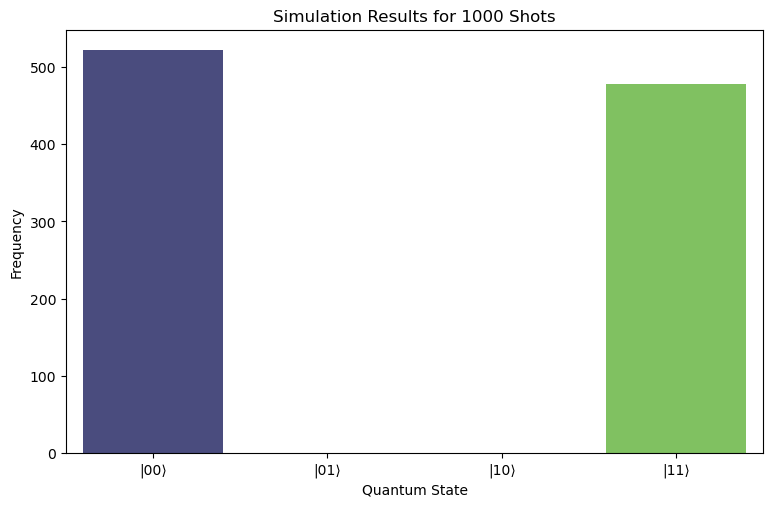

In [35]:
# Initial state-vector of |00>
shots = 1000

# User input
input_sequence = "h0 cx01"

#returns a list of gate matrices from input sequence
gate_sequence, gate_matrices, _ = parse_gate_sequence(input_sequence)

state_vectors_prime, composed_gate_matrix, final_state_vector = compose_and_apply_operations(gate_matrices, init_vector=init_vector)
print("Initial State Vector:")
print_simulation_steps(gate_sequence, gate_matrices, state_vectors_prime)
print("Composed Gate Matrix:")
display_complex_matrix(composed_gate_matrix)
print("Final State Vector:")
display_complex_matrix(final_state_vector)

print(f"Simulating circuit for {shots} shots:")
results=simulate_circuit(final_state_vector, shots=shots)
plot_simulation_results(results,shots)

# D. The Deutsch Algorithm

### Example 1: Using Oracle $U_{f_2}$ ( $f(0) = 0$ and $f(1) = 1$)

Composed Gate Matrix:


<IPython.core.display.Latex object>

Final state vector:


<IPython.core.display.Latex object>

Simulating circuit for 1000 shots:


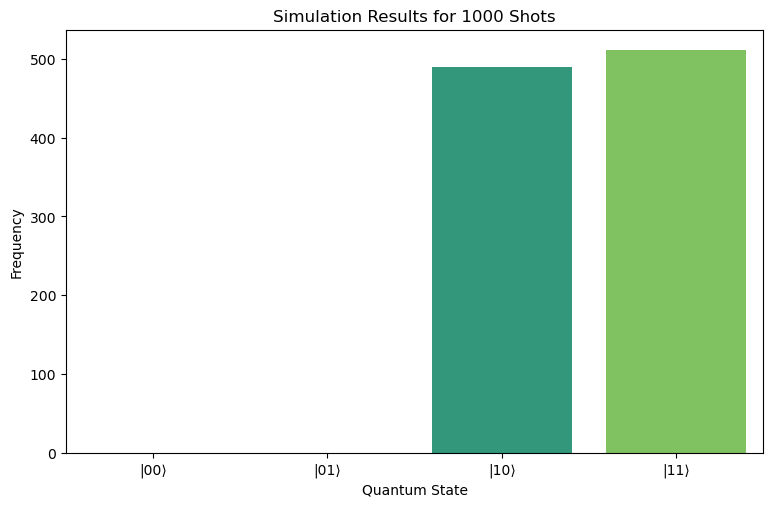

In [39]:
# Initial state-vector of |00>
init_vector = np.array([1, 0, 0, 0], dtype=np.complex128)
shots = 1000

# User input
input_sequence = "x1 h0 h1 uf2 h0"

gate_sequence, gate_matrices, _ = parse_gate_sequence(input_sequence)
state_vectors_prime, composed_gate_matrix, final_state_vector = compose_and_apply_operations(gate_matrices, init_vector)
#print("Simulation steps:")
#print_simulation_steps(gate_sequence, gate_matrices, state_vectors_prime)
print("Composed Gate Matrix:")
display_complex_matrix(composed_gate_matrix)
print("Final state vector:")
display_complex_matrix(final_state_vector)

print(f"Simulating circuit for {shots} shots:")
results=simulate_circuit(final_state_vector, shots=shots)
plot_simulation_results(results,shots)

The first qubit always measured as $ |1\rangle $ which indicates that the oracle is a balanced function.


### Example 2: Random Oracle

Composed Gate Matrix:


<IPython.core.display.Latex object>

Final state vector:


<IPython.core.display.Latex object>

Simulating circuit for 1000 shots:


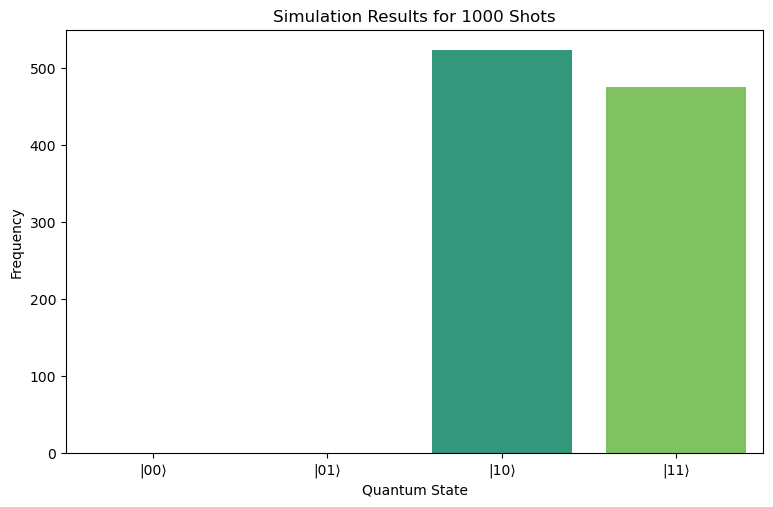

In [40]:
# Initial state-vector of |00>
init_vector = np.array([1, 0, 0, 0], dtype=np.complex128)
shots = 1000

# User input
input_sequence = "x1 h0 h1 oracle h0"

gate_sequence, gate_matrices, _ = parse_gate_sequence(input_sequence)
state_vectors_prime, composed_gate_matrix, final_state_vector = compose_and_apply_operations(gate_matrices, init_vector)
#print("Simulation steps:")
#print_simulation_steps(gate_sequence, gate_matrices, state_vectors_prime)
print("Composed Gate Matrix:")
display_complex_matrix(composed_gate_matrix)
print("Final state vector:")
display_complex_matrix(final_state_vector)

print(f"Simulating circuit for {shots} shots:")
results=simulate_circuit(final_state_vector, shots=shots)
plot_simulation_results(results,shots)

The oracle function is unknown, but a property of the function (balanced or constant) can be determined using a single function call.